In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
#this standardizes features by taking away the mean, and scaling it so that the data is all within roughlt 3 standard
#deviations of the mean, bringing it all in at a comparable scale

scaler = StandardScaler()

#We use the fit here, which finds the mean and standard deviation for every feature
#in df_market_data, and we feed it ot the scaled_data variable
scaled_data = scaler.fit_transform(df_market_data)

#We feed this scaled_data into a df, scaled_market_df, using the columns of the og df
scaled_market_df = pd.DataFrame(scaled_data, columns=df_market_data.columns)

scaled_market_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [7]:
# Copy the crypto names from the original data
# Set the coinid column as index
scaled_market_df = pd.DataFrame(scaled_data, columns=df_market_data.columns, index=df_market_data.index)
scaled_market_df.head(11)

# Display sample data


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Data.

In [8]:
# Create a list with the number of k-values from 1 to 11
#This creates a list of numbers of clusters to try for the k-means algorithm,
#options in hopes of finding an optimal number of clusters
k_values = list(range(1, 12))  # range(1, 12) generates numbers from 1 to 11 (inclusive)

k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [9]:
# Create an empty list to store the inertia values, og for original or first inertia values of this assignment
inertia_values_og = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for k in k_values:
    # Initalize KMeans model
    kmeans = KMeans(n_clusters=k)
    
    # Fit 
    kmeans.fit(scaled_market_df)
    
    # Append the inertia to the inertia list, this will append for each k, or each option of #
    #of clusters, so we can see what the optimal number of clusters may be
    inertia_values_og.append(kmeans.inertia_)
    
inertia_values_og


/Users/cecestreet/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/cecestreet/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/cecestreet/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/cecestreet/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureW

[287.0,
 198.5718180979813,
 123.19048183836958,
 79.02243535120975,
 64.00815267771566,
 52.82981853382919,
 44.4067905846164,
 36.791069782922925,
 32.70234798840646,
 28.222899290608925,
 24.12057685060345]

In [10]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,
    'inertia': inertia_values_og
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)
elbow_df.head(11)

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,123.190482
3,4,79.022435
4,5,64.008153
5,6,52.829819
6,7,44.406791
7,8,36.791070
8,9,32.702348
9,10,28.222899


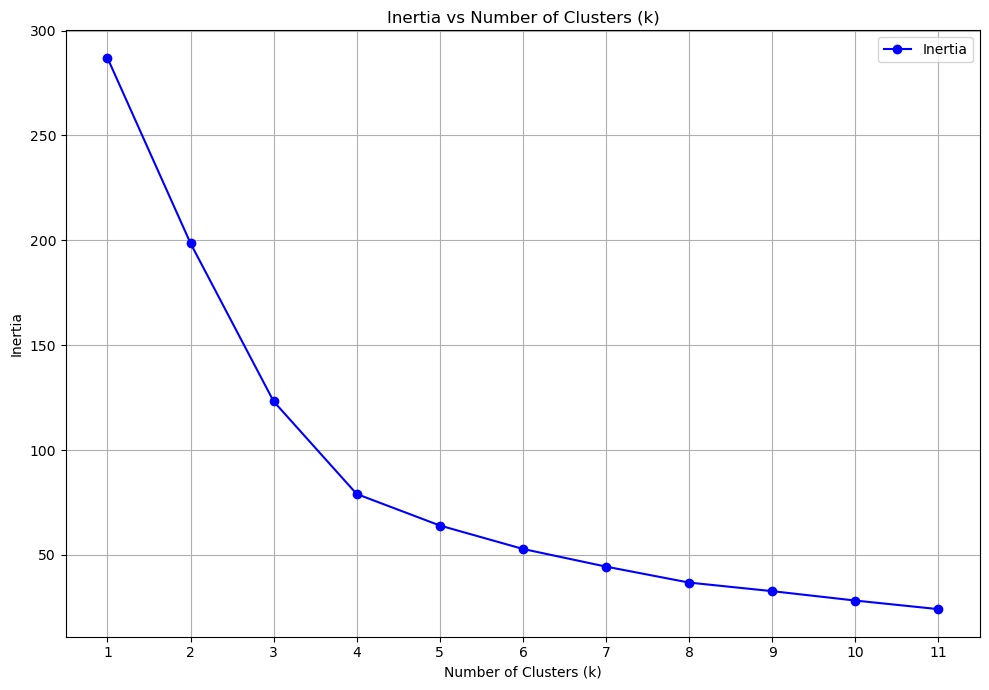

In [13]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
#we want to see inertia and clusters on a map, to find the "elbow" and optimal number of clusters
plt.figure(figsize=(10, 7))
plt.plot(k_values, inertia_values_og, marker='o', linestyle='-', color='b', label='Inertia')
plt.title('Inertia vs Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [17]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)  # Using random_state to better mimic what the model might come into contact with in the future
#42 has been set as the "seed" for the random number generator used by the algorithm, 
#n_init is the number of times the k-means algo will be run, the run with the lowest inertia is the winner(will be the centroid for cluster)
# Fit the K-Means model to the scaled data
kmeans.fit(scaled_market_df)

#Retrieve the cluster labels assigned to each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to the original DataFrame (df_market_data)
df_market_data['cluster'] = cluster_labels

df_market_data.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,0
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,0
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,2
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,2
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,0


In [20]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_predicts = kmeans.predict(scaled_market_df)

cluster_predicts

array([0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 2, 2, 1, 2, 2, 2, 2],
      dtype=int32)

In [21]:
# Create a copy of the DataFrame
df_market_data_copy = df_market_data.copy()

In [22]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data_copy['cluster_predicts'] = cluster_predicts

# Display sample data
df_market_data_copy.head(11)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster,cluster_predicts
coin_id,,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,0,0
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,0,0
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,2,2
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,2,2
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,0,0
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195,0,0
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186,0,0
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756,0,0
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408,0,0


In [25]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

crypto_scatter = df_market_data_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="cluster_predicts",
    hover_cols=["coinid"],
    title="Cryptocurrency Scatter"
)

crypto_scatter

:NdOverlay   [cluster_predicts]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

---

## Optimize Clusters with Principal Component Analysis.

In [31]:
# Create a PCA model instance and set `n_components=3`.
#We want our data to be transformed into three "principal components", or dimensions
pca = PCA(n_components=3)

In [32]:
# We use the fit and transform methods here, fitting the data and transforming it into our principal components 
pca_transformed = pca.fit_transform(df_market_data_copy)

df_market_data_pca = pd.DataFrame(data=pca_transformed, columns=['PC1', 'PC2', 'PC3'])

df_market_data_pca.head(5)

,PC1,PC2,PC3
0,-341.801465,-51.365467,12.529214
1,-249.420972,24.118854,-14.227765
2,-402.614467,-118.711416,24.836528
3,-406.752183,-79.487975,1.564597
4,-382.430449,-103.430641,16.757253


In [35]:
#We want the variance to see how what the information spread is among the 
#principal components.
variance = pca.explained_variance_ratio_

# Print the explained variance ratio for each principal component
#i is gonna represent each individual PC, variance_ratio could be called anything
#but naming it to make it more clear. enumerate(variance) function
#returns the index(i) and the associated value or variance ratio for each item 
#in the list "variance"
for i, variance_ratio in enumerate(variance):
    print(f"PC{i+1} Variance: {ratio:.3f}")

PC1 Variance: 0.001
PC2 Variance: 0.001
PC3 Variance: 0.001


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 1

In [37]:
# Set the coinid column as index
df_market_data_pca.index = df_market_data_copy.index

In [39]:
df_market_data_pca.head(20)

,PC1,PC2,PC3
coin_id,,,
bitcoin,-341.801465,-51.365467,12.529214
ethereum,-249.420972,24.118854,-14.227765
tether,-402.614467,-118.711416,24.836528
ripple,-406.752183,-79.487975,1.564597
bitcoin-cash,-382.430449,-103.430641,16.757253
binancecoin,-289.125524,12.288471,34.167140
chainlink,28.150892,154.989323,-73.122515
cardano,-174.520341,80.244802,-30.388879
litecoin,-406.613842,-91.781723,5.019933


---

### Find the Best Value for k Using the PCA Data

In [21]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [41]:
# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for k in range(1, 12):
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
# 2. Fit the model
    kmeans.fit(df_market_data_pca)
# 3. Append the model.inertia_ to the inertia list
    inertia_values_pca.append(kmeans.inertia_)

inertia_values_pca

/Users/cecestreet/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/cecestreet/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/cecestreet/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/cecestreet/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureW

[69970524.82984634,
 8180192.590988824,
 2580721.180448385,
 823747.2106239712,
 426417.46293661743,
 259209.47955041367,
 202705.48161710182,
 147296.48003070249,
 108685.6300276696,
 85563.46878485593,
 66208.41090130537]

In [43]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,
    'inertia': inertia_values_pca
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data)

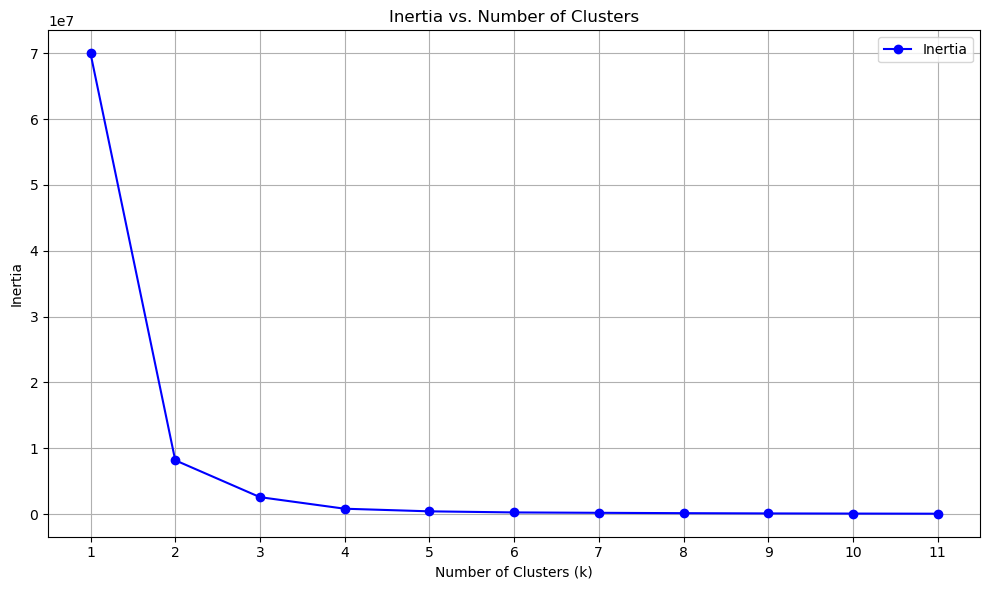

In [44]:
# See the optimal value for k

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values_pca, marker='o', linestyle='-', color='b', label='Inertia')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 2


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Yes

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [45]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters= 2, random_state=42)

In [46]:
# Fit the K-Means model using the PCA data
kmeans.fit(df_market_data_pca)

/Users/cecestreet/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

In [48]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_clusters = kmeans.predict(df_market_data_pca)

# Print the resulting array of cluster values.
pca_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [49]:
# Create a copy of the DataFrame with the PCA data
df_pca_copy = df_market_data_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_copy['pca_clusters'] = pca_clusters

# Display sample data
df_pca_copy

,PC1,PC2,PC3,pca_clusters
coin_id,,,,
bitcoin,-341.801465,-51.365467,12.529214,0
ethereum,-249.420972,24.118854,-14.227765,0
tether,-402.614467,-118.711416,24.836528,0
ripple,-406.752183,-79.487975,1.564597,0
bitcoin-cash,-382.430449,-103.430641,16.757253,0
binancecoin,-289.125524,12.288471,34.167140,0
chainlink,28.150892,154.989323,-73.122515,0
cardano,-174.520341,80.244802,-30.388879,0
litecoin,-406.613842,-91.781723,5.019933,0


In [53]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

pca_cluster_scatter = df_pca_copy.hvplot.scatter(
    x='PC1',
    y='PC2',
    c='pca_clusters',  
    colormap='viridis',
    hover_cols=['crypto_name'],     
    title='PCA with K-Means Clustering',  # Plot title
)

# Display the plot
pca_cluster_scatter

:Scatter   [PC1]   (PC2,pca_clusters)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

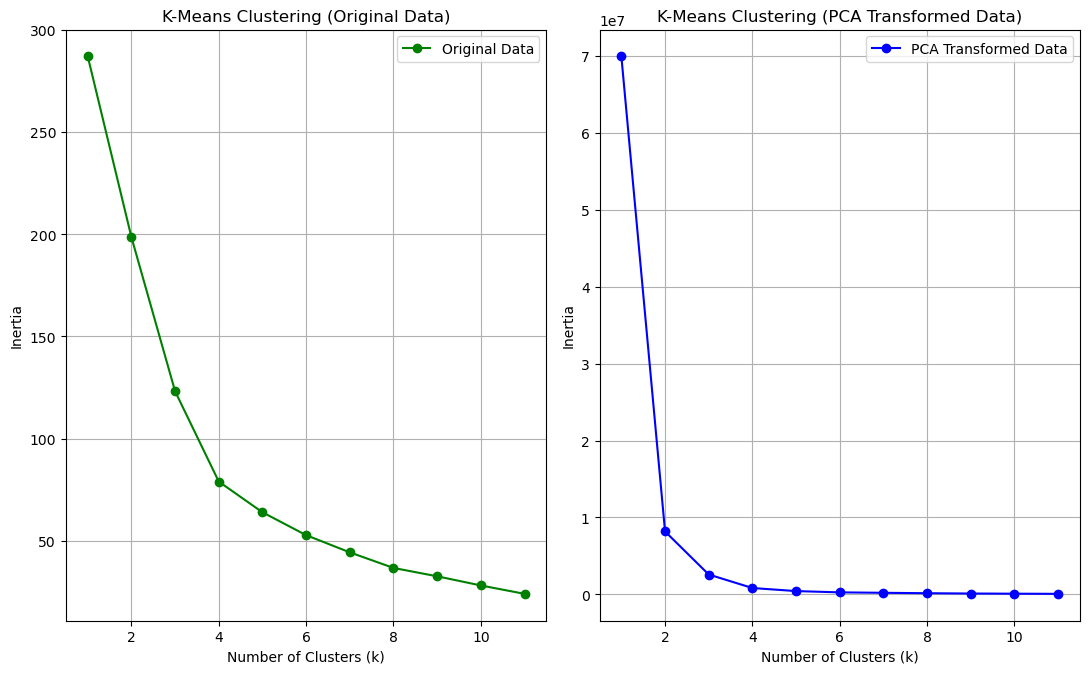

In [59]:
# Composite plot to contrast the Elbow curves
# Define range of k values
k_values = range(1, len(inertia_values_og) + 1)

plt.figure(figsize=(11, 7))

# Original data (without PCA) plot
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values_og, marker='o', linestyle='-', color='g', label='Original Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('K-Means Clustering (Original Data)')
plt.grid(True)
plt.legend()

# PCA-transformed data plot
plt.subplot(1, 2, 2)
plt.plot(k_values, inertia_values_pca, marker='o', linestyle='-', color='b', label='PCA Transformed Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('K-Means Clustering (PCA Transformed Data)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means? 

  * **Answer:** Since it reduces the dimensionality, the inertia falls quicker, showing a smaller number of clusters as optional. This makes sense as the data is re-distributed along new axes's with PCA. Thank you for your time!